## TASK-2

`Indicator Analysis and Financial Matrics`

`Load and prepare the data`

In [1]:
import pandas as pd

data = pd.read_csv('../datas/yfinance_data/AAPL_historical_data.csv')

print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


`Apply Analyis Indicator with TA-Lib`

In [6]:
import talib

data['SMA'] = talib.SMA(data['Close'], timeperiod=30)
data['EMA'] = talib.EMA(data['Close'], timeperiod=30)

data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

data = data.dropna()
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal,MACD_Hist
33,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.097223,46188800,0.0,0.0,0.141871,0.138602,39.642837,-0.000377,0.001789,-0.002166
34,1981-02-02,0.119420,0.119420,0.118862,0.118862,0.091630,23766400,0.0,0.0,0.141871,0.137328,34.943807,-0.001930,0.001045,-0.002975
35,1981-02-03,0.123326,0.123884,0.123326,0.123326,0.095072,19152000,0.0,0.0,0.141778,0.136425,39.682098,-0.002769,0.000282,-0.003051
36,1981-02-04,0.127790,0.128348,0.127790,0.127790,0.098513,27865600,0.0,0.0,0.141629,0.135868,44.069116,-0.003038,-0.000382,-0.002656
37,1981-02-05,0.127790,0.128906,0.127790,0.127790,0.098513,7929600,0.0,0.0,0.141295,0.135347,44.069116,-0.003215,-0.000949,-0.002266


`Use PyNance for Financial Matrics`

In [17]:
import pynance as pn

stock_data = pn.data.get('AAPL', '2018-01-01', '2019-01-01')

# Calculate a simple moving average (SMA)
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# Calculate volatility (standard deviation of returns)
stock_data['Returns'] = stock_data['Close'].pct_change()
volatility = stock_data['Returns'].std()

# Calculate average return
average_return = stock_data['Returns'].mean()

# Print results
print(f"Volatility: {volatility}")
print(f"Average Return: {average_return}")
print(stock_data[['Close', 'SMA_50']].tail())


Volatility: 0.018159630549912646
Average Return: 0.0004562773442129564
              Close     SMA_50
Date                          
2018-01-08  41.0713  40.742960
2018-01-05  41.2125  40.738358
2018-01-04  40.7534  40.724336
2018-01-03  40.5616  40.693560
2018-01-02  40.5685  40.659996


`Visualize the data`

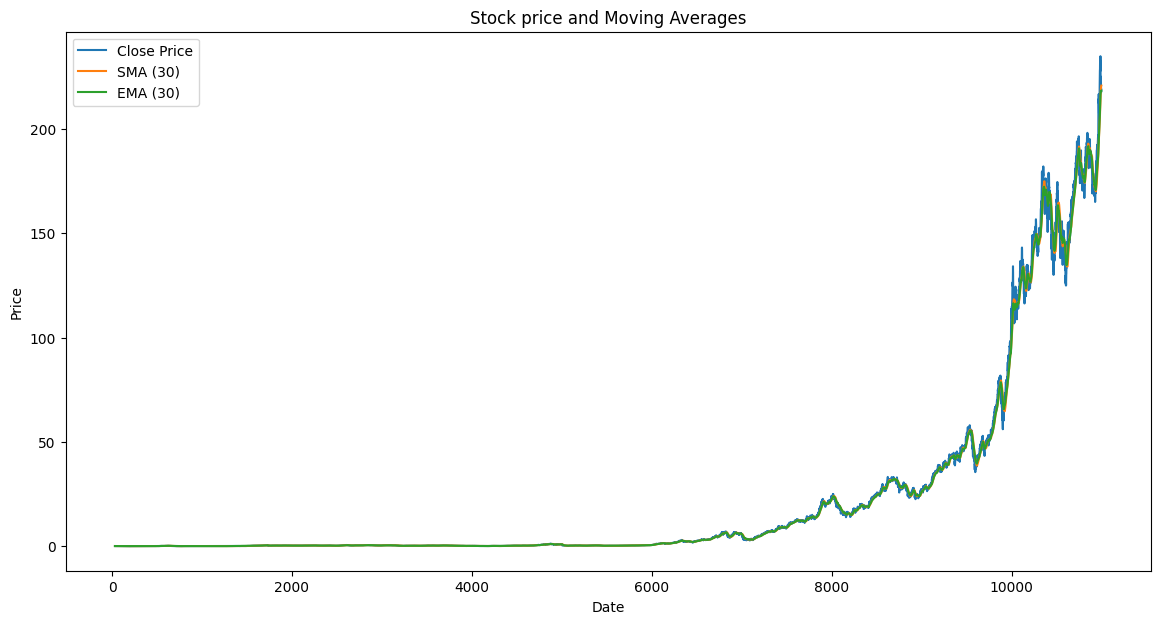

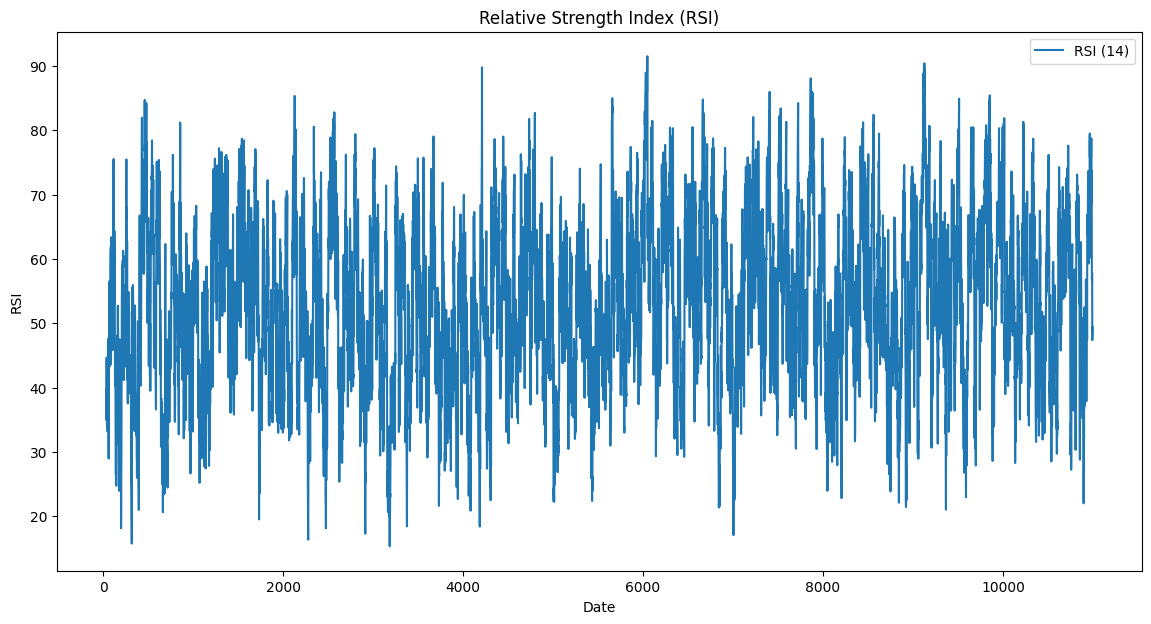

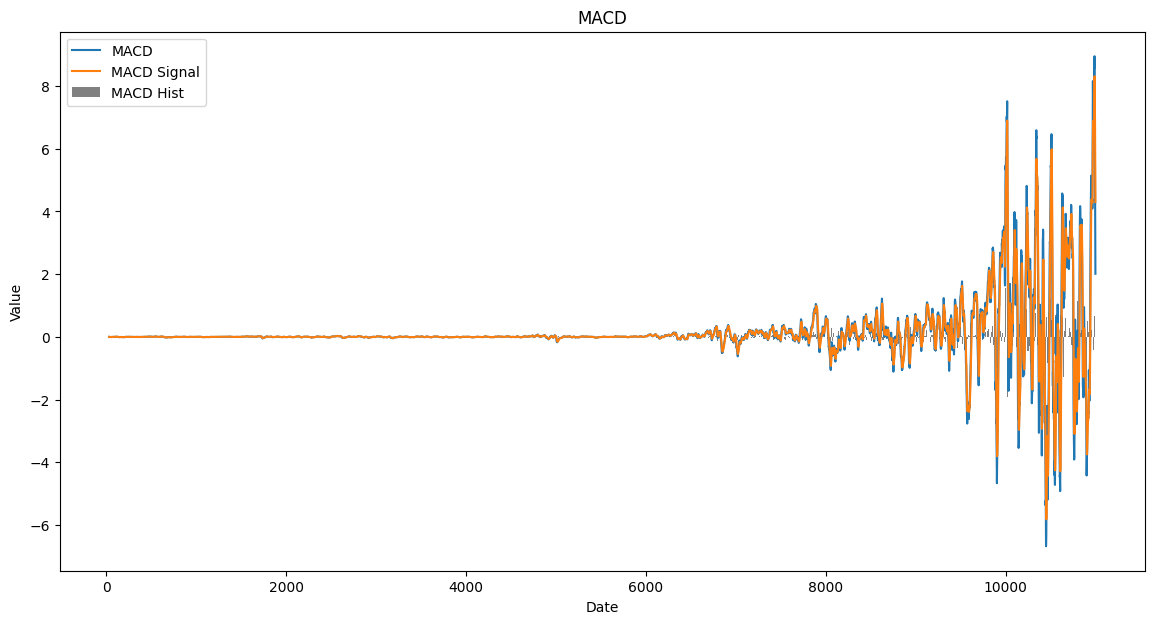

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA'], label='SMA (30)')
plt.plot(data['EMA'], label='EMA (30)')
plt.title('Stock price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI (14)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_Signal'], label='MACD Signal')
plt.bar(data.index, data['MACD_Hist'], label='MACD Hist', color='gray')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()